In [1]:
# Import necessary libraries
import numpy as np, matplotlib.pyplot as plt, warnings
warnings.simplefilter('ignore')

# Initializations
c      = 299792458/1.00029
h      = 25000
L      = 100
v      = 1.00029 * c
times  = np.linspace(1e-6,1e-4,500000,endpoint=True)
T      = []
Z1, Z2 = [], []
B1, B2 = [], []


# Print the height of first RID
zc     = (c*L)/np.sqrt(v*v - c*c)
print(r'First RID location = ', round(zc/1000,2), 'km')


# Computations
for t in times:
    
    z  = h - v*t
    tt = t + np.sqrt(L*L+z*z)/c

    num1 = (c*c*tt*v - c*c*h)
    num2 = np.sqrt((c*c*v*v*h*h) - (2*h*tt*c*c*v*v*v) + (L*L*c*c*v*v) + (c*c*tt*tt*v*v*v*v) - (L*L*v*v*v*v))
    den  = (v*v - c*c)
    
    z1 = (num1+num2)/den
    z2 = (num1-num2)/den
    
    v1   = ( ( (c*c*v*v*(2*tt*v*v - 2*h*v)) / (2*np.sqrt(c*c*v*v*(h*h+L*L+tt*tt*v*v-2*h*tt*v)-(L*L*v*v*v*v)   )) ) + (c*c*v) ) / (v*v - c*c)
    v2   = (-( (c*c*v*v*(2*tt*v*v - 2*h*v)) / (2*np.sqrt(c*c*v*v*(h*h+L*L+tt*tt*v*v-2*h*tt*v)-(L*L*v*v*v*v)   )) ) + (c*c*v) ) / (v*v - c*c)

    phi1 = np.arctan(z1/L)
    phi2 = np.arctan(z2/L)
    
    v1t  = v1*np.cos(phi1)
    v2t  = v2*np.cos(phi2)
    
    omega1 = v1t/(np.sqrt(L*L + z1*z1))
    omega2 = v2t/(np.sqrt(L*L + z2*z2))

    b1   = abs(omega1/((L*L + z1*z1)))
    b2   = abs(omega2/((L*L + z2*z2)))
    
    #b1 = abs(b1)
    #b2 = abs(b2)

    if (z2<=0):
        break
    else:
        T .append(tt)
        Z1.append(z1)
        Z2.append(z2)
        B1.append(b1)
        B2.append(b2)
  

        
T  = np.array(T )
Z1 = np.array(Z1)
Z2 = np.array(Z2)
B1 = np.array(B1)
B2 = np.array(B2)

T.shape[0]

def ground_brightness(tt, z2=0, phi=0):
    num1   = (c*c*tt*v - c*c*h)
    num2   = np.sqrt((c*c*v*v*h*h) - (2*h*tt*c*c*v*v*v) + (L*L*c*c*v*v) + (c*c*tt*tt*v*v*v*v) - (L*L*v*v*v*v))
    den    = (v*v - c*c)
    z2     = (num1-num2)/den
    v2     = (-( (c*c*v*v*(2*tt*v*v - 2*h*v)) / (2*np.sqrt(c*c*v*v*(h*h+L*L+tt*tt*v*v-2*h*tt*v)-(L*L*v*v*v*v)   )) ) + (c*c*v) ) / (v*v - c*c)
    phi2 = np.arctan(z2/L)
    b2     = (v2*np.cos(phi2))/ ((L*L + z2*z2)**(3/2))
    b2     = abs(b2)
    return b2

Bg = ground_brightness(((h/v)+(L/c)), 0, 0)
print('Ground Brightness:', Bg)
Z1n = Z1/1000
Z2n = Z2/1000
B1  = B1/Bg
B2  = B2/Bg
Tn   = T * 1e+9
TT   = Tn-Tn.min()

First RID location =  4.15 km
Ground Brightness: 299.79246174535587


## $z_{\pm}\;vs\;t$  

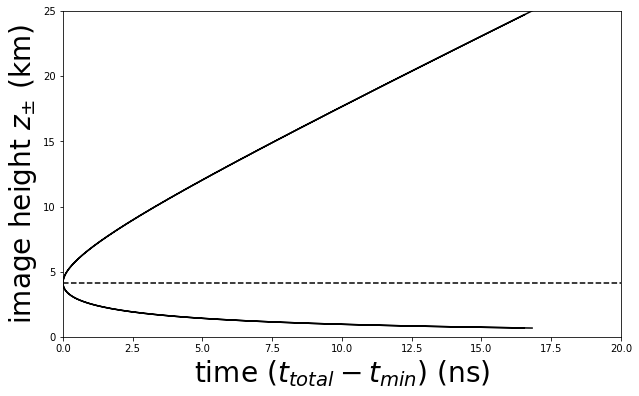

In [2]:
plt.figure(figsize=(10,6))
plt.plot(TT         , Z1n, c='k')
plt.plot(TT[Z1n<=25], Z2n[Z1n<=25], c='k')
plt.axhline(zc/1000, ls='--',c='k')

plt.xlabel(r'time $( t_{total} - t_{min} )$ (ns)', fontsize=28)
plt.ylabel(r'image height $z_{\pm}$ (km)', fontsize=28)
plt.ylim(0,25)
plt.xlim(0,20)
plt.show()

## $B \;vs\; z_{\pm}$ 

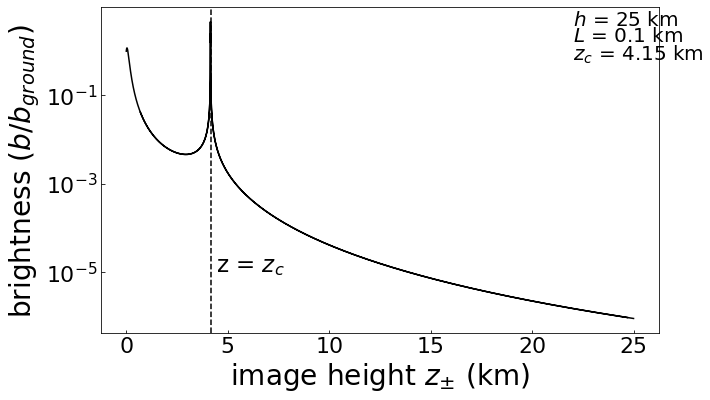

In [3]:
plt.figure(figsize=(10,6))
plt.plot(Z2n, B2, c='k')
plt.plot(Z1n[Z1n<=25], B1[Z1n<=25], c='k')
plt.axvline(zc/1000, ls='--',c='k')

plt.xlabel(r'image height $z_{\pm}$ (km)', fontsize=28)
plt.ylabel(r'brightness ($b/b_{ground}$) ', fontsize=28)

plt.yscale('log')
#plt.ylim(2e-7,10)

plt.text(4.400,1e-5,r'z = $z_c$', fontsize=23)
plt.text(22.000, 3.8 , r'$h$ = 25 km'     , fontsize=20)
plt.text(22.000, 1.6 , r'$L$ = 0.1 km', fontsize=20)
plt.text(22.000, 0.6 , r'$z_c$ = 4.15 km', fontsize=20)

plt.tick_params(axis='both', direction='in', labelsize=22)

## $B \;vs\; t$  

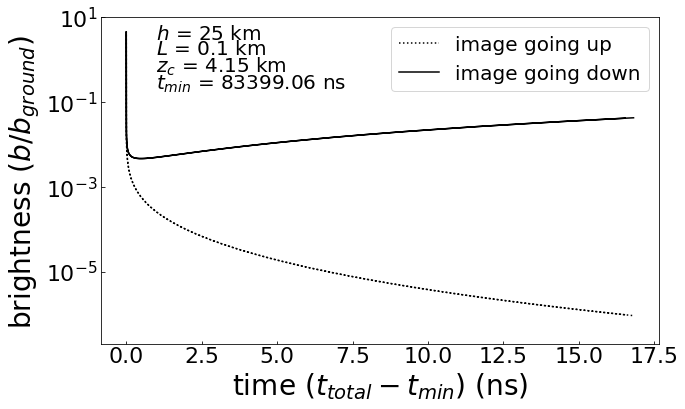

In [4]:
plt.figure(figsize=(10,6))
plt.plot(TT[Z1n<=25], B1[Z1n<=25], 'k:',label='image going up'  )  #---- B = B1+B2
plt.plot(TT[Z1n<=25], B2[Z1n<=25], 'k' ,label='image going down')

plt.xlabel(r'time $( t_{total} - t_{min} )$ (ns)', fontsize=28)
plt.ylabel(r'brightness ($b/b_{ground}$) ', fontsize=28)
plt.text(1, 3 , r'$h$ = 25 km'     , fontsize=20)
plt.text(1, 1.3 , r'$L$ = 0.1 km', fontsize=20)
plt.text(1, 0.5 , r'$z_c$ = 4.15 km', fontsize=20)
plt.text(1, 0.2 , r'$t_{min}$ = 83399.06 ns' , fontsize=20)
plt.ylim(2e-7,10)
plt.yscale('log')
plt.legend(prop={'size':20})
plt.tick_params(axis='both', direction='in', labelsize=22)
plt.show()